In [ ]:
pip install nlp

In [3]:
import nlp

In [19]:
ds_train = nlp.load_dataset('imdb', split='train')
ds_val = nlp.load_dataset('imdb', split='test')

In [20]:
ds_train.column_names

['label', 'text']

In [21]:
train_text = ds_train['text']
seq_lens = {}
for text in train_text:
  seq = text.split()
  seq_len = len(seq)
  if seq_len not in seq_lens:
    seq_lens[seq_len] = 1
  else:
    seq_lens[seq_len] += 1


<BarContainer object of 996 artists>

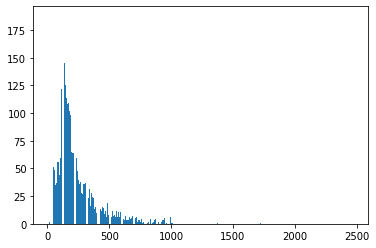

In [22]:
import matplotlib.pyplot as plt

plt.bar(seq_lens.keys(), seq_lens.values())

0.5


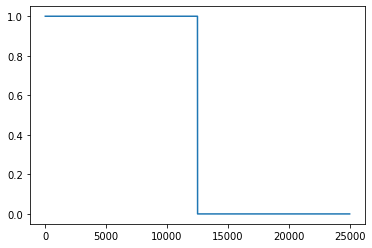

In [50]:
train_labels = ds_train['label']
print(sum(train_labels)/len(train_labels))
plt.plot(range(len(train_labels)), train_labels)

In [48]:
val_text = ds_val['text']
val_seq_lens = {}
for text in val_text:
  seq = text.split()
  seq_len = len(seq)

  if seq_len not in val_seq_lens:
    val_seq_lens[seq_len] = 1
  else:
    val_seq_lens[seq_len] += 1

<BarContainer object of 971 artists>

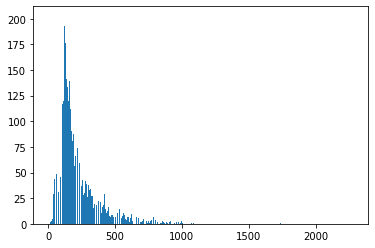

In [36]:
plt.bar(val_seq_lens.keys(), val_seq_lens.values())

0.5


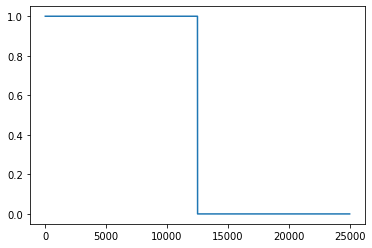

In [51]:
val_labels = ds_val['label']
print(sum(val_labels)/len(val_labels))
plt.plot(range(len(val_labels)), val_labels)

In [49]:
import numpy as np
arr = []
for i in seq_lens:
  arr.extend([i]*seq_lens[i])

print("75% of train data is below", np.quantile(arr, 0.75))

arr = []
for i in val_seq_lens:
  arr.extend([i]*val_seq_lens[i])
print("75% of val data is below", np.quantile(arr, 0.75))


75% of train data is below 284.0
75% of val data is below 277.0


In [84]:
train_text = ds_train['text']


In [85]:
import re

html_tags = []
special_chars = []
hyperlinks = []
words_with_nums = []
for train in train_text:
    #x = re.sub('\[.*?\]', '', x)
    batRegex = re.compile(r'<.*?>+')
    
    m1=batRegex.search(train)
    html_tags.extend(batRegex.findall(train))

    batRegex = re.compile(r'\n | \t')
    m1=batRegex.search(train)
    special_chars.extend(batRegex.findall(train))

    
    batRegex = re.compile(r'https?://\S+|www\.\S+')
    m1=batRegex.search(train)
    hyperlinks.extend(batRegex.findall(train))

    batRegex = re.compile(r'([A-Za-z]+[\d@]+[\w@]*|[\d@]+[A-Za-z]+[\w@]*)')
    m1=batRegex.search(train)
    words_with_nums.extend(batRegex.findall(train))
  
print('Number of html tags:', len(html_tags))
print('Number of special chars:', len(special_chars))
print('Number of hyperlinks:', len(hyperlinks))
print('Number of words with numbers:', len(words_with_nums))

Number of html tags: 101892
Number of special chars: 0
Number of hyperlinks: 105
Number of words with numbers: 4640


In [76]:
train = 'abc123vc csc 12 3b'
batRegex = re.compile(r'([A-Za-z]+[\d@]+[\w@]*|[\d@]+[A-Za-z]+[\w@]*)')
m1=batRegex.search(train)
print(batRegex.findall(train))

['abc123vc', '3b']


A quick EDA shows the following:
1. The dataset is not shuffled, so we must shuffle them before training so that the model could learn normally.
2. The length of the validation dataset and the train dataset is the same
3. The length of the texts are long, so the tokenizer maxlen should be about 250-300 to capture more than 75% of the data.
4. The data may need to be cleaned, since there are:

  Number of html tags: 101892

  Number of special chars: 0

  Number of hyperlinks: 105

  Number of words with numbers: 4640